In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/DL Project/Dataset

/content/drive/MyDrive/DL Project/Dataset


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout
from keras.models import Sequential, Model
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

In [ ]:
female_train_path= '/content/drive/MyDrive/DL Project/Dataset/Train/Female'
male_train_path= '/content/drive/MyDrive/DL Project/Dataset/Train/Male'
female_test_path='/content/drive/MyDrive/DL Project/Dataset/Test/Female'
male_test_path='/content/drive/MyDrive/DL Project/Dataset/Test/Male'

Visualize Classes

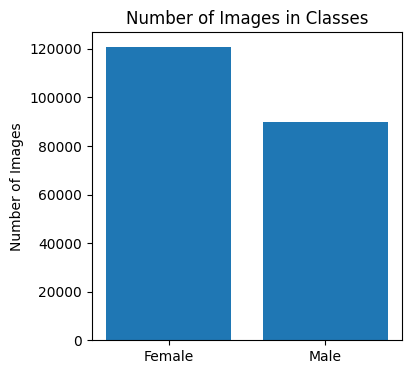

In [ ]:
# Count the number of images in female
trainf_num= len([file for file in os.listdir(female_train_path) if file.endswith('.jpg')])
trainm_num =len([file for file in os.listdir(male_train_path) if file.endswith('.jpg')])
testf_num=len([file for file in os.listdir(female_test_path) if file.endswith('.jpg')])
testm_num=len([file for file in os.listdir(male_test_path) if file.endswith('.jpg')])

train_num=trainf_num+trainm_num
test_num=testf_num+testm_num

num_imagesF = trainf_num+testf_num
num_imagesM = trainm_num+testm_num
# Create a bar plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(['Female', 'Male'], [num_imagesF, num_imagesM])
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images in Classes')
plt.show()

PreProcessing

In [ ]:
train_datagen = ImageDataGenerator( rescale=1./255,rotation_range=30,shear_range=0.3,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds = train_datagen.flow_from_directory('/content/drive/MyDrive/DL Project/Dataset/Train', target_size = (64, 64), batch_size = 32,class_mode = 'binary')
test_ds = test_datagen.flow_from_directory('/content/drive/MyDrive/DL Project/Dataset/Test', target_size = (64, 64), batch_size = 32,class_mode = 'binary')

Found 199362 images belonging to 2 classes.
Found 11299 images belonging to 2 classes.


In [ ]:
train_ds = train_datagen.flow_from_directory('/content/drive/MyDrive/DL Project/Dataset/SampleTrain', target_size = (64, 64), batch_size = 32,class_mode = 'binary')
test_ds = test_datagen.flow_from_directory('/content/drive/MyDrive/DL Project/Dataset/SampleTest', target_size = (64, 64), batch_size = 32,class_mode = 'binary')

Found 2172 images belonging to 2 classes.
Found 1152 images belonging to 2 classes.


In [ ]:
train_ds.image_shape
test_ds.image_shape

(64, 64, 3)

CNN

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()], optimizer=sgd)

history = model.fit(train_ds,batch_size=32, epochs=15, verbose=2)
score1 = model.evaluate(test_ds, batch_size=32, verbose=0)
print(model.metrics_names)
print(score1)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
68/68 - 187s - loss: 0.6291 - accuracy: 0.4645 - precision: 0.4645 - 187s/epoch - 3s/step
Epoch 2/15
68/68 - 23s - loss: 0.5301 - accuracy: 0.4645 - precision: 0.4645 - 23s/epoch - 333ms/step
Epoch 3/15
68/68 - 21s - loss: 0.5158 - accuracy: 0.4645 - precision: 0.4645 - 21s/epoch - 312ms/step
Epoch 4/15
68/68 - 20s - loss: 0.4823 - accuracy: 0.4645 - precision: 0.4645 - 20s/epoch - 293ms/step
Epoch 5/15
68/68 - 21s - loss: 0.4460 - accuracy: 0.4645 - precision: 0.4645 - 21s/epoch - 313ms/step
Epoch 6/15
68/68 - 20s - loss: 0.3968 - accuracy: 0.4645 - precision: 0.4645 - 20s/epoch - 296ms/step
Epoch 7/15
68/68 - 21s - loss: 0.3789 - accuracy: 0.4645 - precision: 0.4645 - 21s/epoch - 303ms/step
Epoch 8/15
68/68 - 20s - loss: 0.3586 - accuracy: 0.4645 - precision: 0.4645 - 20s/epoch - 290ms/step
Epoch 9/15
68/68 - 21s - loss: 0.3211 - accuracy: 0.4645 - precision: 0.4645 - 21s/epoch - 308ms/step
Epoch 10/15
68/68 - 21s - loss: 0.3216 - accuracy: 0.4645 - precision: 0.4645 - 21s

Improvment 1

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()], optimizer='rmsprop')

history = model.fit(train_ds,batch_size=32, epochs=15, verbose=2)
score1 = model.evaluate(test_ds, batch_size=32, verbose=0)
print(model.metrics_names)
print(score1)

Epoch 1/15
68/68 - 11s - loss: 0.6542 - accuracy: 0.6123 - precision_3: 0.6112 - recall_2: 0.4549 - 11s/epoch - 164ms/step
Epoch 2/15
68/68 - 11s - loss: 0.5754 - accuracy: 0.7053 - precision_3: 0.6982 - recall_2: 0.6442 - 11s/epoch - 157ms/step
Epoch 3/15
68/68 - 12s - loss: 0.5394 - accuracy: 0.7320 - precision_3: 0.7250 - recall_2: 0.6819 - 12s/epoch - 173ms/step
Epoch 4/15
68/68 - 13s - loss: 0.5104 - accuracy: 0.7560 - precision_3: 0.7417 - recall_2: 0.7284 - 13s/epoch - 191ms/step
Epoch 5/15
68/68 - 10s - loss: 0.4854 - accuracy: 0.7703 - precision_3: 0.7505 - recall_2: 0.7572 - 10s/epoch - 152ms/step
Epoch 6/15
68/68 - 11s - loss: 0.4764 - accuracy: 0.7831 - precision_3: 0.7658 - recall_2: 0.7681 - 11s/epoch - 160ms/step
Epoch 7/15
68/68 - 11s - loss: 0.4391 - accuracy: 0.8071 - precision_3: 0.7898 - recall_2: 0.7968 - 11s/epoch - 159ms/step
Epoch 8/15
68/68 - 10s - loss: 0.4105 - accuracy: 0.8218 - precision_3: 0.8110 - recall_2: 0.8038 - 10s/epoch - 153ms/step
Epoch 9/15
68/68

Improvment 2

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(64,64,3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('linear'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()], optimizer='rmsprop')

history = model.fit(train_ds,batch_size=32, epochs=10, verbose=2)
score1 = model.evaluate(test_ds, batch_size=32, verbose=0)
print(model.metrics_names)
print(score1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


68/68 - 11s - loss: 0.6767 - accuracy: 0.6459 - precision_7: 0.6296 - recall_6: 0.5778 - 11s/epoch - 156ms/step
Epoch 2/10
68/68 - 10s - loss: 0.5207 - accuracy: 0.7560 - precision_7: 0.7658 - recall_6: 0.6838 - 10s/epoch - 153ms/step
Epoch 3/10
68/68 - 11s - loss: 0.4687 - accuracy: 0.7827 - precision_7: 0.7743 - recall_6: 0.7512 - 11s/epoch - 155ms/step
Epoch 4/10
68/68 - 11s - loss: 0.4073 - accuracy: 0.8163 - precision_7: 0.8144 - recall_6: 0.7830 - 11s/epoch - 168ms/step
Epoch 5/10
68/68 - 11s - loss: 0.3689 - accuracy: 0.8416 - precision_7: 0.8335 - recall_6: 0.8236 - 11s/epoch - 155ms/step
Epoch 6/10
68/68 - 11s - loss: 0.3574 - accuracy: 0.8508 - precision_7: 0.8463 - recall_6: 0.8295 - 11s/epoch - 157ms/step
Epoch 7/10
68/68 - 10s - loss: 0.3348 - accuracy: 0.8614 - precision_7: 0.8519 - recall_6: 0.8494 - 10s/epoch - 154ms/step
Epoch 8/10
68/68 - 11s - loss: 0.3197 - accuracy: 0.8628 - precision_7: 0.8551 - recall_6: 0.8484 - 11s/epoch - 158ms/step
Epoch 9/10
68/68 - 10s - lo

1st Model Compare MLP

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(64,64,3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()], optimizer='adam')

history = model.fit(train_ds,batch_size=32, epochs=10, verbose=2)
score1 = model.evaluate(test_ds, batch_size=32, verbose=0)
print(model.metrics_names)
print(score1)

Epoch 1/10
68/68 - 8s - loss: 1.0374 - accuracy: 0.5907 - precision_8: 0.5645 - recall_7: 0.5203 - 8s/epoch - 125ms/step
Epoch 2/10
68/68 - 8s - loss: 0.6947 - accuracy: 0.6174 - precision_8: 0.5969 - recall_7: 0.5431 - 8s/epoch - 114ms/step
Epoch 3/10
68/68 - 8s - loss: 0.6343 - accuracy: 0.6575 - precision_8: 0.6442 - recall_7: 0.5867 - 8s/epoch - 113ms/step
Epoch 4/10
68/68 - 10s - loss: 0.5594 - accuracy: 0.7145 - precision_8: 0.7173 - recall_7: 0.6363 - 10s/epoch - 154ms/step
Epoch 5/10
68/68 - 8s - loss: 0.5705 - accuracy: 0.7081 - precision_8: 0.7018 - recall_7: 0.6462 - 8s/epoch - 119ms/step
Epoch 6/10
68/68 - 8s - loss: 0.6099 - accuracy: 0.6897 - precision_8: 0.6888 - recall_7: 0.6056 - 8s/epoch - 112ms/step
Epoch 7/10
68/68 - 8s - loss: 0.5780 - accuracy: 0.6957 - precision_8: 0.6887 - recall_7: 0.6293 - 8s/epoch - 114ms/step
Epoch 8/10
68/68 - 8s - loss: 0.5603 - accuracy: 0.7099 - precision_8: 0.7108 - recall_7: 0.6333 - 8s/epoch - 119ms/step
Epoch 9/10
68/68 - 8s - loss: 

2nd Model Compare LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units= 4,input_shape=(64,3),return_sequences=True))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()], optimizer='rmsprop')

history = model.fit(train_ds,batch_size=32, epochs=10, verbose=2)
score1 = model.evaluate(test_ds, batch_size=32, verbose=0)
print(model.metrics_names)
print(score1)

Visualize Results

<Axes: title={'center': 'Scores of Models'}, ylabel='Model'>

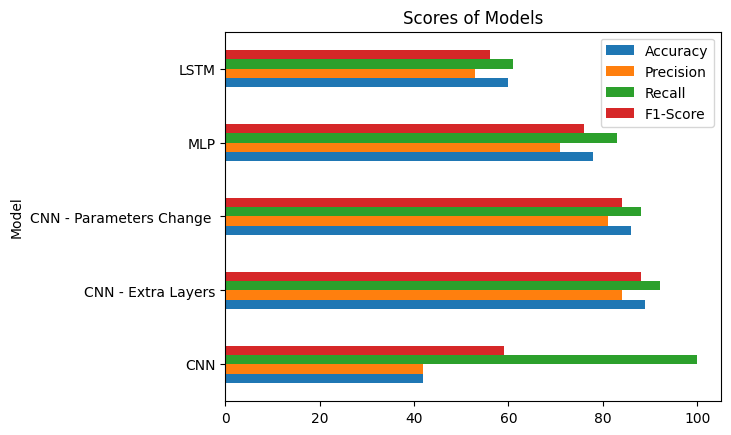

In [ ]:
# create data
df = pd.DataFrame([['CNN', 42, 42, 100, 59], ['CNN - Extra Layers', 89, 84, 92, 88], ['CNN - Parameters Change ', 86, 81, 88, 84],
                   ['MLP', 78, 71, 83, 76],['LSTM',60 ,53 ,61,56 ]],
                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
# plot grouped bar chart
df.plot(x='Model',
        kind='barh',
        stacked=False,
        title='Scores of Models')